<a href="https://colab.research.google.com/github/JotaDC/AluraStore/blob/main/AluraStoreLatam.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Importación de datos



In [55]:
import pandas as pd

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"

tienda1 = pd.read_csv(url)
tienda2 = pd.read_csv(url2)
tienda3 = pd.read_csv(url3)
tienda4 = pd.read_csv(url4)

tienda1.head()

,Producto,Categoría del Producto,Precio,Costo de envío,Fecha de Compra,Vendedor,Lugar de Compra,Calificación,Método de pago,Cantidad de cuotas,lat,lon
0,Asistente virtual,Electrónicos,164300.0,6900.0,16/01/2021,Pedro Gomez,Bogotá,4,Tarjeta de crédito,8,4.60971,-74.08175
1,Mesa de comedor,Muebles,192300.0,8400.0,18/05/2022,Beatriz Morales,Medellín,1,Tarjeta de crédito,4,6.25184,-75.56359
2,Juego de mesa,Juguetes,209600.0,15900.0,15/03/2021,Juan Fernandez,Cartagena,1,Tarjeta de crédito,1,10.39972,-75.51444
3,Microondas,Electrodomésticos,757500.0,41000.0,03/05/2022,Juan Fernandez,Cali,4,Nequi,1,3.43722,-76.52250
4,Silla de oficina,Muebles,335200.0,20200.0,07/11/2020,Maria Alfonso,Medellín,5,Nequi,1,6.25184,-75.56359


#1. Análisis de facturación



In [78]:
#Crea lista de precios de los productos vendidos de cada tienda
list_facturacion_tienda1=list(tienda1['Precio'])
list_facturacion_tienda2=list(tienda2['Precio'])
list_facturacion_tienda3=list(tienda3['Precio'])
list_facturacion_tienda4=list(tienda4['Precio'])
#Realiza la suma e los precios de los productos vendidos de cada tienda
facturacion_total_tienda1=sum(list_facturacion_tienda1)
facturacion_total_tienda2=sum(list_facturacion_tienda2)
facturacion_total_tienda3=sum(list_facturacion_tienda3)
facturacion_total_tienda4=sum(list_facturacion_tienda4)
#Muestra la faturacion total por cada tienda
print(f"La facturacion total de la tienda 1 es de {facturacion_total_tienda1:,.2f} ")
print(f"La facturacion total de la tienda 2 es de {facturacion_total_tienda2:,.2f} ")
print(f"La facturacion total de la tienda 3 es de {facturacion_total_tienda3:,.2f} ")
print(f"La facturacion total de la tienda 4 es de {facturacion_total_tienda4:,.2f} ")

La facturacion total de la tienda 1 es de 1,150,880,400.00 
La facturacion total de la tienda 2 es de 1,116,343,500.00 
La facturacion total de la tienda 3 es de 1,098,019,600.00 
La facturacion total de la tienda 4 es de 1,038,375,700.00 


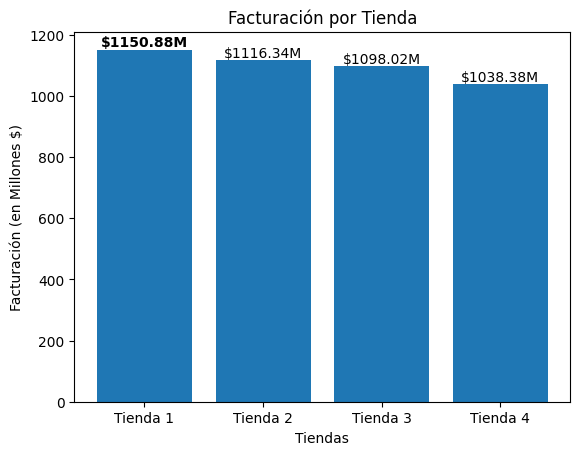

In [79]:
import matplotlib.pyplot as plt
plt.bar(['Tienda 1', 'Tienda 2', 'Tienda 3', 'Tienda 4'], [facturacion_total_tienda1/1000000, facturacion_total_tienda2/1000000, facturacion_total_tienda3/1000000, facturacion_total_tienda4/1000000])
plt.xlabel('Tiendas')
plt.ylabel('Facturación (en Millones $)')
plt.title('Facturación por Tienda')
# Agregar etiquetas con los valores encima de cada barra

plt.text(0, facturacion_total_tienda1/1000000 + 0.1, f"${facturacion_total_tienda1/1000000:.2f}M", ha='center', va='bottom', color='black', fontweight='bold')
plt.text(1, facturacion_total_tienda2/1000000 + 0.1, f"${facturacion_total_tienda2/1000000:.2f}M", ha='center', va='bottom', color='black', fontweight='normal')
plt.text(2, facturacion_total_tienda3/1000000 + 0.1, f"${facturacion_total_tienda3/1000000:.2f}M", ha='center', va='bottom', color='black', fontweight='normal')
plt.text(3, facturacion_total_tienda4/1000000 + 0.1, f"${facturacion_total_tienda4/1000000:.2f}M", ha='center', va='bottom', color='black', fontweight='normal')

plt.show()

# 2. Ventas por categoría

In [58]:
#Genera lista de todas las categorias vendidas
list_ventas_por_categoria_tienda1=list(tienda1['Categoría del Producto'])
list_ventas_por_categoria_tienda2=list(tienda2['Categoría del Producto'])
list_ventas_por_categoria_tienda3=list(tienda3['Categoría del Producto'])
list_ventas_por_categoria_tienda4=list(tienda4['Categoría del Producto'])
#Genera lista unica de categorias vendidas (sin repetidos)
unicos_tienda1=set(list_ventas_por_categoria_tienda1)
unicos_tienda2=set(list_ventas_por_categoria_tienda2)
unicos_tienda3=set(list_ventas_por_categoria_tienda3)
unicos_tienda4=set(list_ventas_por_categoria_tienda4)

# Crea diccionario con la categoria y la cantidad de repeticiones por cada tienda
# Tienda1
conteo_categorias1 = {}
for categoria in unicos_tienda1:
  cantidad=list_ventas_por_categoria_tienda1.count(categoria)
  conteo_categorias1[categoria] = cantidad
for categoria, conteo in conteo_categorias1.items():
    print(f"Tienda1 -> La categoría '{categoria}' aparece {conteo} veces.")

#Tienda2
conteo_categorias2 = {}
for categoria in unicos_tienda2:
  cantidad=list_ventas_por_categoria_tienda2.count(categoria)
  conteo_categorias2[categoria] = cantidad
for categoria, conteo in conteo_categorias2.items():
    print(f"Tienda2 -> La categoría '{categoria}' aparece {conteo} veces.")

#Tienda3
conteo_categorias3 = {}
for categoria in unicos_tienda3:
  cantidad=list_ventas_por_categoria_tienda3.count(categoria)
  conteo_categorias3[categoria] = cantidad
for categoria, conteo in conteo_categorias3.items():
    print(f"Tienda3 -> La categoría '{categoria}' aparece {conteo} veces.")

#Tienda4
conteo_categorias4 = {}
for categoria in unicos_tienda4:
  cantidad=list_ventas_por_categoria_tienda4.count(categoria)
  conteo_categorias4[categoria] = cantidad
for categoria, conteo in conteo_categorias4.items():
    print(f"Tienda4 -> La categoría '{categoria}' aparece {conteo} veces.")

Tienda1 -> La categoría 'Instrumentos musicales' aparece 182 veces.
Tienda1 -> La categoría 'Artículos para el hogar' aparece 171 veces.
Tienda1 -> La categoría 'Deportes y diversión' aparece 284 veces.
Tienda1 -> La categoría 'Electrónicos' aparece 448 veces.
Tienda1 -> La categoría 'Juguetes' aparece 324 veces.
Tienda1 -> La categoría 'Muebles' aparece 465 veces.
Tienda1 -> La categoría 'Electrodomésticos' aparece 312 veces.
Tienda1 -> La categoría 'Libros' aparece 173 veces.
Tienda2 -> La categoría 'Artículos para el hogar' aparece 181 veces.
Tienda2 -> La categoría 'Deportes y diversión' aparece 275 veces.
Tienda2 -> La categoría 'Electrónicos' aparece 422 veces.
Tienda2 -> La categoría 'Juguetes' aparece 313 veces.
Tienda2 -> La categoría 'Electrodomésticos' aparece 305 veces.
Tienda2 -> La categoría 'Libros' aparece 197 veces.
Tienda2 -> La categoría 'Muebles' aparece 442 veces.
Tienda2 -> La categoría 'Instrumentos musicales' aparece 224 veces.
Tienda3 -> La categoría 'Artículos

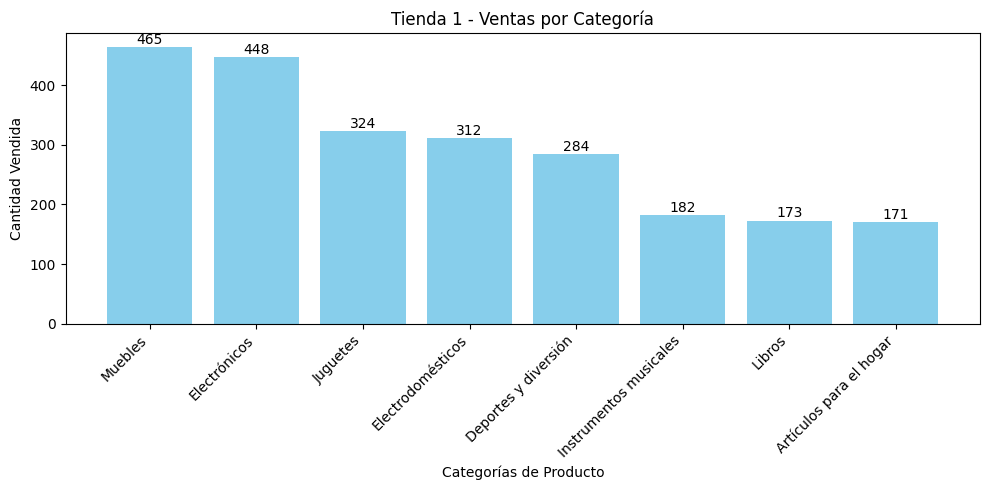

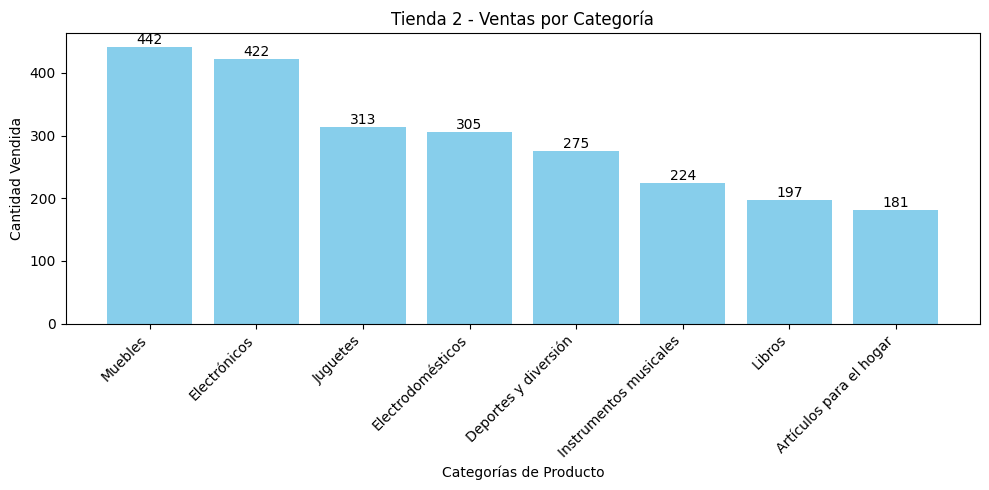

In [73]:
def graficar_conteo(conteo_dict, titulo):
    categorias = list(conteo_dict.keys())
    cantidades = list(conteo_dict.values())

    plt.figure(figsize=(10, 5))
    plt.bar(categorias, cantidades, color='skyblue')
    plt.xlabel('Categorías de Producto')
    plt.ylabel('Cantidad Vendida')
    plt.title(titulo)
    plt.xticks(rotation=45, ha='right')

    # Agregar etiquetas arriba de cada barra
    for i, valor in enumerate(cantidades):
        plt.text(i, valor + 0.2, str(valor), ha='center', va='bottom')

    plt.tight_layout()
    plt.show()
# Ordeno las listas para graficar de mayor a menor
conteo_categorias1 = dict(sorted(conteo_categorias1.items(), key=lambda item: item[1], reverse=True))
conteo_categorias2 = dict(sorted(conteo_categorias2.items(), key=lambda item: item[1], reverse=True))
conteo_categorias3 = dict(sorted(conteo_categorias3.items(), key=lambda item: item[1], reverse=True))
conteo_categorias4 = dict(sorted(conteo_categorias4.items(), key=lambda item: item[1], reverse=True))
# --- Graficar cada tienda ---

graficar_conteo(conteo_categorias1, "Tienda 1 - Ventas por Categoría")
graficar_conteo(conteo_categorias2, "Tienda 2 - Ventas por Categoría")




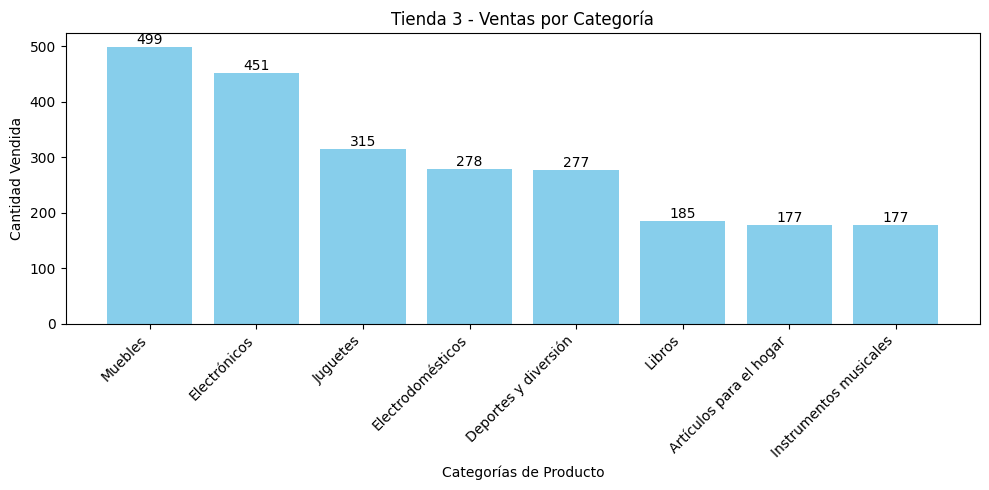

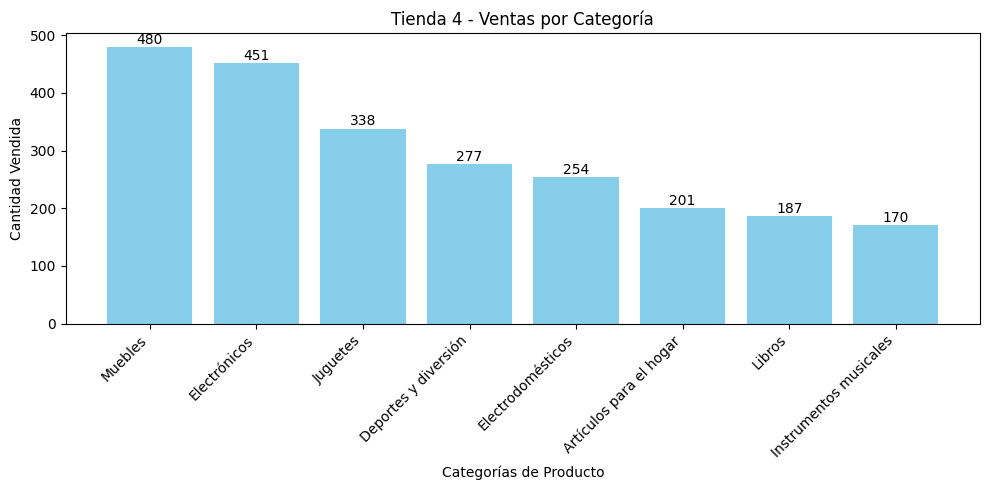

In [60]:
graficar_conteo(conteo_categorias3, "Tienda 3 - Ventas por Categoría")
graficar_conteo(conteo_categorias4, "Tienda 4 - Ventas por Categoría")

# 3. Calificación promedio de la tienda


In [61]:
#Genera lista con las calificaciones de cada tienda
lista_calificaciones_tienda1=list(tienda1['Calificación'])
lista_calificaciones_tienda2=list(tienda2['Calificación'])
lista_calificaciones_tienda3=list(tienda3['Calificación'])
lista_calificaciones_tienda4=list(tienda4['Calificación'])
#Suma las calificaciones de cada tienda
suma_calificaciones_tienda1=sum(lista_calificaciones_tienda1)
suma_calificaciones_tienda2=sum(lista_calificaciones_tienda2)
suma_calificaciones_tienda3=sum(lista_calificaciones_tienda3)
suma_calificaciones_tienda4=sum(lista_calificaciones_tienda4)
#Cuenta la cantidad de elementos de cada lista
cantidad_calificaciones_tienda1=len(lista_calificaciones_tienda1)
cantidad_calificaciones_tienda2=len(lista_calificaciones_tienda2)
cantidad_calificaciones_tienda3=len(lista_calificaciones_tienda3)
cantidad_calificaciones_tienda4=len(lista_calificaciones_tienda4)
#Realiza promedio de las calificaciones de cada tienda
promedio_calificaciones_tienda1=suma_calificaciones_tienda1/cantidad_calificaciones_tienda1
promedio_calificaciones_tienda2=suma_calificaciones_tienda2/cantidad_calificaciones_tienda2
promedio_calificaciones_tienda3=suma_calificaciones_tienda3/cantidad_calificaciones_tienda3
promedio_calificaciones_tienda4=suma_calificaciones_tienda4/cantidad_calificaciones_tienda4
#Imprime el promedio de calificacion por tienda
print(f"La calificacion promedio de la tienda 1 es de {promedio_calificaciones_tienda1:,.2f} ")
print(f"La calificacion promedio de la tienda 2 es de {promedio_calificaciones_tienda2:,.2f} ")
print(f"La calificacion promedio de la tienda 3 es de {promedio_calificaciones_tienda3:,.2f} ")
print(f"La calificacion promedio de la tienda 4 es de {promedio_calificaciones_tienda4:,.2f} ")

La calificacion promedio de la tienda 1 es de 3.98 
La calificacion promedio de la tienda 2 es de 4.04 
La calificacion promedio de la tienda 3 es de 4.05 
La calificacion promedio de la tienda 4 es de 4.00 


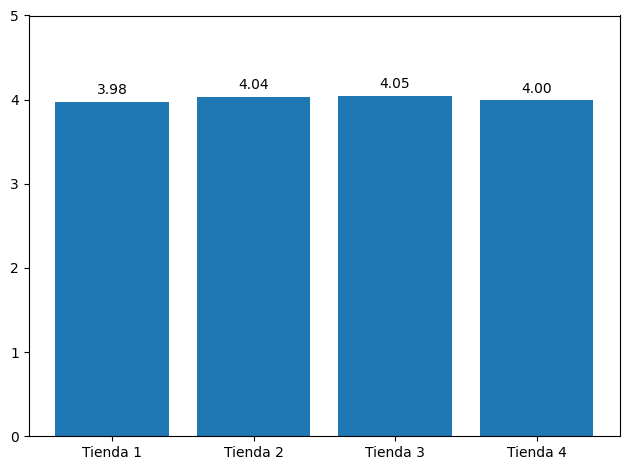

In [62]:
import matplotlib.pyplot as plt
plt.bar(['Tienda 1', 'Tienda 2', 'Tienda 3', 'Tienda 4'], [promedio_calificaciones_tienda1, promedio_calificaciones_tienda2, promedio_calificaciones_tienda3, promedio_calificaciones_tienda4])

promedios=[promedio_calificaciones_tienda1,promedio_calificaciones_tienda2,promedio_calificaciones_tienda3,promedio_calificaciones_tienda4]
# Agregar etiquetas arriba de cada barra
for i, valor in enumerate(promedios):
    plt.text(i, valor + 0.05, f"{valor:.2f}", ha='center', va='bottom')

plt.ylim(0, 5)  # Rango del eje Y (opcional, si el máximo es 5)
plt.tight_layout()
plt.show()

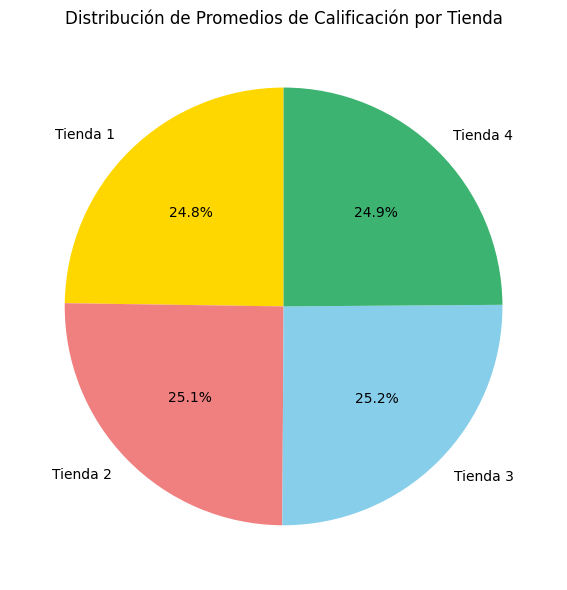

In [63]:
tiendas = ['Tienda 1', 'Tienda 2', 'Tienda 3', 'Tienda 4']
promedios = [
    promedio_calificaciones_tienda1,
    promedio_calificaciones_tienda2,
    promedio_calificaciones_tienda3,
    promedio_calificaciones_tienda4
]
# Gráfico circular
plt.figure(figsize=(6, 6))
plt.pie(
    promedios,
    labels=tiendas,
    autopct='%1.1f%%',  # Mostrar valores como porcentaje
    startangle=90,
    colors=['gold', 'lightcoral', 'skyblue', 'mediumseagreen']
)

plt.title('Distribución de Promedios de Calificación por Tienda')
plt.tight_layout()

# 4. Productos más y menos vendidos

In [64]:
#Genera lista de todas las productos vendidas
lista_productos_vendidos_tienda1=list(tienda1['Producto'])
lista_productos_vendidos_tienda2=list(tienda2['Producto'])
lista_productos_vendidos_tienda3=list(tienda3['Producto'])
lista_productos_vendidos_tienda4=list(tienda4['Producto'])
#Lista con no repetidos
unicos_productos_tienda1=set(lista_productos_vendidos_tienda1)
unicos_productos_tienda2=set(lista_productos_vendidos_tienda2)
unicos_productos_tienda3=set(lista_productos_vendidos_tienda3)
unicos_productos_tienda4=set(lista_productos_vendidos_tienda4)

productos_tienda1={}
for producto in unicos_productos_tienda1:
  cantidad=lista_productos_vendidos_tienda1.count(producto)
  productos_tienda1[producto] = cantidad
productos_tienda2={}
for producto in unicos_productos_tienda2:
  cantidad=lista_productos_vendidos_tienda2.count(producto)
  productos_tienda2[producto] = cantidad

productos_tienda3={}
for producto in unicos_productos_tienda3:
  cantidad=lista_productos_vendidos_tienda3.count(producto)
  productos_tienda3[producto] = cantidad

productos_tienda4={}
for producto in unicos_productos_tienda4:
  cantidad=lista_productos_vendidos_tienda4.count(producto)
  productos_tienda4[producto] = cantidad

# obtener el producto y cantidad del mas vendido de cada lista
producto_mas_vendido_tienda1 = max(productos_tienda1, key=productos_tienda1.get)
producto_mas_vendido_tienda2 = max(productos_tienda2, key=productos_tienda2.get)
producto_mas_vendido_tienda3 = max(productos_tienda3, key=productos_tienda3.get)
producto_mas_vendido_tienda4 = max(productos_tienda4, key=productos_tienda4.get)
cantidad_mas_vendido_tienda1 = productos_tienda1[producto_mas_vendido_tienda1]
cantidad_mas_vendido_tienda2 = productos_tienda2[producto_mas_vendido_tienda2]
cantidad_mas_vendido_tienda3 = productos_tienda3[producto_mas_vendido_tienda3]
cantidad_mas_vendido_tienda4 = productos_tienda4[producto_mas_vendido_tienda4]

# imprimir el resultado
print(f"El producto más vendido en la tienda 1 es '{producto_mas_vendido_tienda1}' con {cantidad_mas_vendido_tienda1} unidades vendidas.")
print(f"El producto más vendido en la tienda 2 es '{producto_mas_vendido_tienda2}' con {cantidad_mas_vendido_tienda2} unidades vendidas.")
print(f"El producto más vendido en la tienda 3 es '{producto_mas_vendido_tienda3}' con {cantidad_mas_vendido_tienda3} unidades vendidas.")
print(f"El producto más vendido en la tienda 4 es '{producto_mas_vendido_tienda4}' con {cantidad_mas_vendido_tienda4} unidades vendidas.")

# obtener el producto y cantidad del menos vendido de cada lista
producto_menos_vendido_tienda1 = min(productos_tienda1, key=productos_tienda1.get)
producto_menos_vendido_tienda2 = min(productos_tienda2, key=productos_tienda2.get)
producto_menos_vendido_tienda3 = min(productos_tienda3, key=productos_tienda3.get)
producto_menos_vendido_tienda4 = min(productos_tienda4, key=productos_tienda4.get)
cantidad_menos_vendido_tienda1 = productos_tienda1[producto_menos_vendido_tienda1]
cantidad_menos_vendido_tienda2 = productos_tienda2[producto_menos_vendido_tienda2]
cantidad_menos_vendido_tienda3 = productos_tienda3[producto_menos_vendido_tienda3]
cantidad_menos_vendido_tienda4 = productos_tienda4[producto_menos_vendido_tienda4]

# imprimir el resultado
print(f"El producto menos vendido en la tienda 1 es '{producto_menos_vendido_tienda1}' con {cantidad_menos_vendido_tienda1} unidades vendidas.")
print(f"El producto menos vendido en la tienda 2 es '{producto_menos_vendido_tienda2}' con {cantidad_menos_vendido_tienda2} unidades vendidas.")
print(f"El producto menos vendido en la tienda 3 es '{producto_menos_vendido_tienda3}' con {cantidad_menos_vendido_tienda3} unidades vendidas.")
print(f"El producto menos vendido en la tienda 4 es '{producto_menos_vendido_tienda4}' con {cantidad_menos_vendido_tienda4} unidades vendidas.")



El producto más vendido en la tienda 1 es 'TV LED UHD 4K' con 60 unidades vendidas.
El producto más vendido en la tienda 2 es 'Iniciando en programación' con 65 unidades vendidas.
El producto más vendido en la tienda 3 es 'Kit de bancas' con 57 unidades vendidas.
El producto más vendido en la tienda 4 es 'Cama box' con 62 unidades vendidas.
El producto menos vendido en la tienda 1 es 'Celular ABXY' con 33 unidades vendidas.
El producto menos vendido en la tienda 2 es 'Juego de mesa' con 32 unidades vendidas.
El producto menos vendido en la tienda 3 es 'Bloques de construcción' con 35 unidades vendidas.
El producto menos vendido en la tienda 4 es 'Guitarra eléctrica' con 33 unidades vendidas.


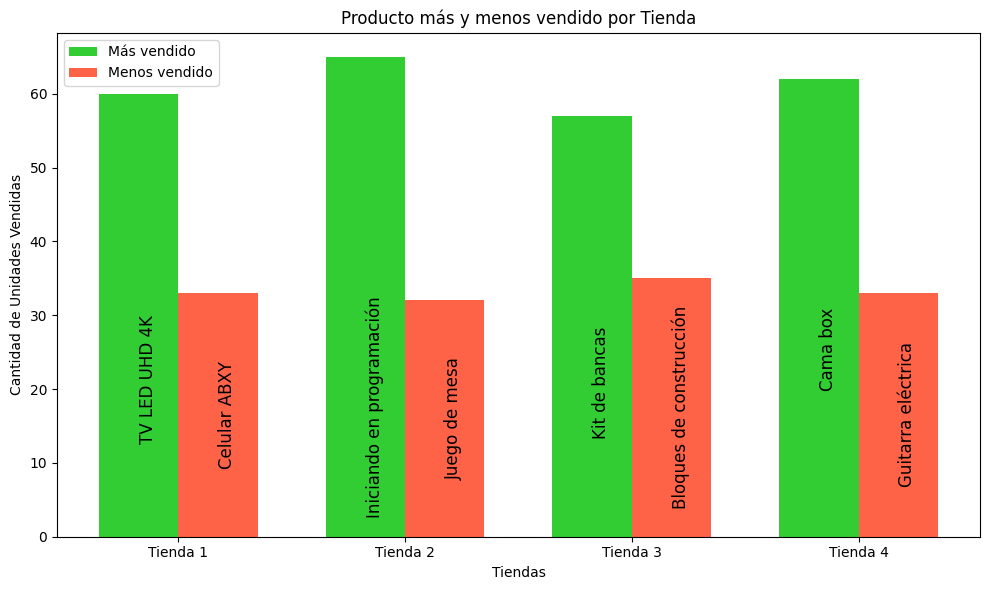

In [71]:
import matplotlib.pyplot as plt
import numpy as np

tiendas = ['Tienda 1', 'Tienda 2', 'Tienda 3', 'Tienda 4']

productos_mas_vendidos = [
    producto_mas_vendido_tienda1,
    producto_mas_vendido_tienda2,
    producto_mas_vendido_tienda3,
    producto_mas_vendido_tienda4
]

productos_menos_vendidos = [
    producto_menos_vendido_tienda1,
    producto_menos_vendido_tienda2,
    producto_menos_vendido_tienda3,
    producto_menos_vendido_tienda4
]

cantidades_mas_vendidos = [
    cantidad_mas_vendido_tienda1,
    cantidad_mas_vendido_tienda2,
    cantidad_mas_vendido_tienda3,
    cantidad_mas_vendido_tienda4
]

cantidades_menos_vendidos = [
    cantidad_menos_vendido_tienda1,
    cantidad_menos_vendido_tienda2,
    cantidad_menos_vendido_tienda3,
    cantidad_menos_vendido_tienda4
]

# Posiciones
x = np.arange(len(tiendas))
ancho = 0.35

# Gráfico de barras
plt.figure(figsize=(10, 6))
barras_mas = plt.bar(x - ancho/2, cantidades_mas_vendidos, width=ancho, label='Más vendido', color='limegreen')
barras_menos = plt.bar(x + ancho/2, cantidades_menos_vendidos, width=ancho, label='Menos vendido', color='tomato')

# Etiquetas, título, etc.
plt.xlabel('Tiendas')
plt.ylabel('Cantidad de Unidades Vendidas')
plt.title('Producto más y menos vendido por Tienda')
plt.xticks(x, tiendas)
plt.legend()

# Agregar nombres centrados dentro de las barras
for i in range(len(tiendas)):
    # Texto dentro de la barra "más vendido"
    plt.text(x[i] - ancho/2, cantidades_mas_vendidos[i]/2, productos_mas_vendidos[i],
             ha='left', va='top', fontsize=12, color='black', rotation=90)

    # Texto dentro de la barra "menos vendido"
    plt.text(x[i] + ancho/2, cantidades_menos_vendidos[i]/2, productos_menos_vendidos[i],
             ha='left', va='center', fontsize=12, color='black', rotation=90)

plt.tight_layout()
plt.show()

# 5. Envío promedio por tienda

In [90]:
# Genera lista con los costos de envío de cada tienda
lista_envios_tienda1 = list(tienda1['Costo de envío'])
lista_envios_tienda2 = list(tienda2['Costo de envío'])
lista_envios_tienda3 = list(tienda3['Costo de envío'])
lista_envios_tienda4 = list(tienda4['Costo de envío'])

# Suma los costos de envío de cada tienda
suma_envios_tienda1 = sum(lista_envios_tienda1)
suma_envios_tienda2 = sum(lista_envios_tienda2)
suma_envios_tienda3 = sum(lista_envios_tienda3)
suma_envios_tienda4 = sum(lista_envios_tienda4)

# Cuenta la cantidad de elementos de cada lista
cantidad_envios_tienda1 = len(lista_envios_tienda1)
cantidad_envios_tienda2 = len(lista_envios_tienda2)
cantidad_envios_tienda3 = len(lista_envios_tienda3)
cantidad_envios_tienda4 = len(lista_envios_tienda4)

# Realiza promedio de los costos de envío de cada tienda
promedio_envios_tienda1 = suma_envios_tienda1 / cantidad_envios_tienda1
promedio_envios_tienda2 = suma_envios_tienda2 / cantidad_envios_tienda2
promedio_envios_tienda3 = suma_envios_tienda3 / cantidad_envios_tienda3
promedio_envios_tienda4 = suma_envios_tienda4 / cantidad_envios_tienda4

# Imprime el promedio de envío por tienda
print(f"El costo de envío promedio de la tienda 1 es de {promedio_envios_tienda1:,.2f}")
print(f"El costo de envío promedio de la tienda 2 es de {promedio_envios_tienda2:,.2f}")
print(f"El costo de envío promedio de la tienda 3 es de {promedio_envios_tienda3:,.2f}")
print(f"El costo de envío promedio de la tienda 4 es de {promedio_envios_tienda4:,.2f}")



El costo de envío promedio de la tienda 1 es de 26,018.61
El costo de envío promedio de la tienda 2 es de 25,216.24
El costo de envío promedio de la tienda 3 es de 24,805.68
El costo de envío promedio de la tienda 4 es de 23,459.46


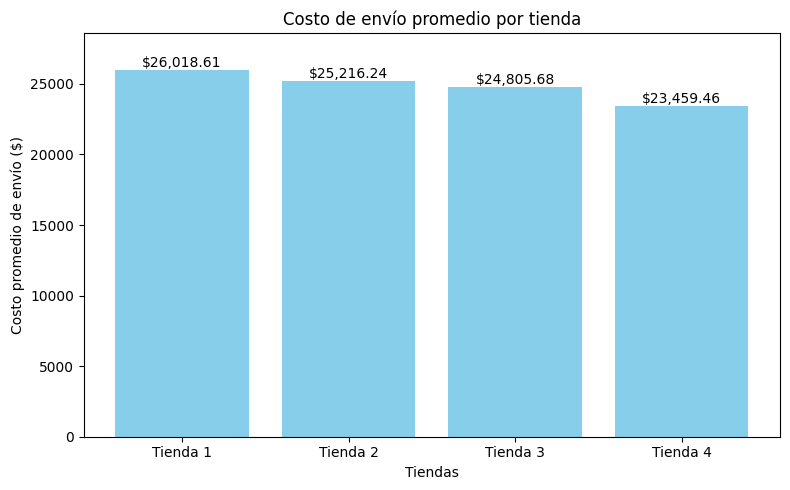

In [80]:
import matplotlib.pyplot as plt

# Nombres de las tiendas
tiendas = ['Tienda 1', 'Tienda 2', 'Tienda 3', 'Tienda 4']

# Promedios ya calculados
promedios = [
    promedio_envios_tienda1,
    promedio_envios_tienda2,
    promedio_envios_tienda3,
    promedio_envios_tienda4
]

# Crear gráfico de barras
plt.figure(figsize=(8, 5))
barras = plt.bar(tiendas, promedios, color='skyblue')

# Título y etiquetas
plt.title('Costo de envío promedio por tienda')
plt.xlabel('Tiendas')
plt.ylabel('Costo promedio de envío ($)')
plt.ylim(0, max(promedios) * 1.1)  # Un poco más alto para que entren los valores

# Mostrar el valor numérico encima de cada barra
for barra, valor in zip(barras, promedios):
    plt.text(barra.get_x() + barra.get_width()/2, barra.get_height(),
             f"${valor:,.2f}", ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.show()


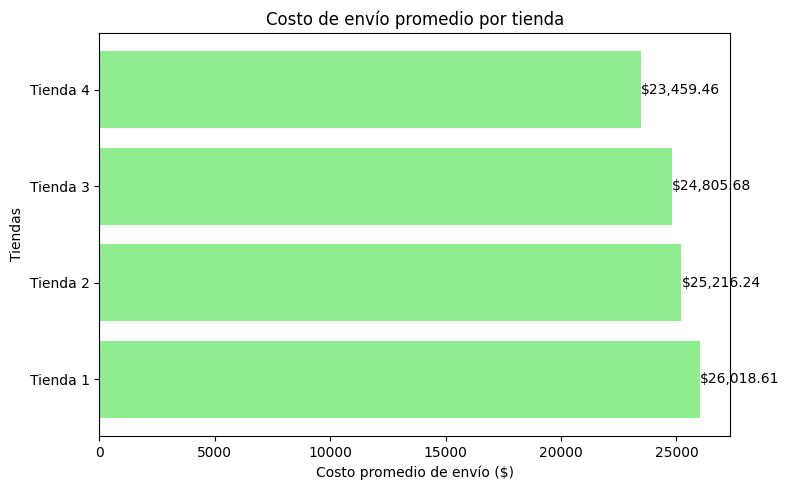

In [89]:
plt.figure(figsize=(8, 5))
barras = plt.barh(tiendas, promedios, color='lightgreen')
plt.title('Costo de envío promedio por tienda')
plt.xlabel('Costo promedio de envío ($)')
plt.ylabel('Tiendas')

for barra, valor in zip(barras, promedios):
    plt.text(valor + 0.1, barra.get_y() + barra.get_height()/2,
             f"${valor:,.2f}", va='center')

plt.tight_layout()
plt.show()


